### Python and APIs

In [ ]:
import requests
import pandas as pd
import json

Now that we've imported the necessary libraries, let's try to receive information using an API. We'll be using the following dataset in NYC OpenData: https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw/about_data. This dataset can be downloaded as a csv file, or we can copy its API endpoint and retrieve information that way.

In [ ]:
response = requests.get('https://data.cityofnewyork.us/resource/vfnx-vebw.json')
print(response)

<Response [200]>


Understanding response codes:
- 200 indicates a successful request
- 201 indicates a successful request, when a "PUT" request is placed
- 400 indicates a bad request
- 401 indicates that you need authorization
- 404 indicates that the request was not found(maybe the endpoint doesn't exist)
- 429 indicates too many requests (rate limit)
- 500 indicates an internal server error

Understanding our API endpoint:

Just like with a new python library, best way to understand an API is through it's documentation: https://dev.socrata.com/foundry/data.cityofnewyork.us/vfnx-vebw

This documentation tells us that "vfnx-vebw" is the unique code identifier for the dataset we're working with.

In [ ]:
response_dict = response.json()
print(response_dict)

[{'x': '-73.9561344937861', 'y': '40.7940823884086', 'unique_squirrel_id': '37F-PM-1014-03', 'hectare': '37F', 'shift': 'PM', 'date': '10142018', 'hectare_squirrel_number': '3', 'combination_of_primary_and': '+', 'running': False, 'chasing': False, 'climbing': False, 'eating': False, 'foraging': False, 'kuks': False, 'quaas': False, 'moans': False, 'tail_flags': False, 'tail_twitches': False, 'approaches': False, 'indifferent': False, 'runs_from': False, 'geocoded_column': {'type': 'Point', 'coordinates': [-73.9561344937861, 40.7940823884086]}, ':@computed_region_f5dn_yrer': '19', ':@computed_region_yeji_bk3q': '4', ':@computed_region_92fq_4b7q': '19', ':@computed_region_sbqj_enih': '13'}, {'x': '-73.9688574691102', 'y': '40.7837825208444', 'unique_squirrel_id': '21B-AM-1019-04', 'hectare': '21B', 'shift': 'AM', 'date': '10192018', 'hectare_squirrel_number': '4', 'combination_of_primary_and': '+', 'running': False, 'chasing': False, 'climbing': False, 'eating': False, 'foraging': False

The ".json()" function turns the response we received into a python list of dictionaries.

In [ ]:
print(type(response_dict))

<class 'list'>


View an entry of a record

In [ ]:
response_dict[1]['hectare_squirrel_number']

'4'

From json to Dataframe

In [ ]:
df = pd.DataFrame(response_dict)
df

x                 y unique_squirrel_id hectare shift  \
0    -73.9561344937861  40.7940823884086     37F-PM-1014-03     37F    PM   
1    -73.9688574691102  40.7837825208444     21B-AM-1019-04     21B    AM   
2    -73.9742811484852   40.775533619083     11B-PM-1014-08     11B    PM   
3    -73.9596413903948  40.7903128889029     32E-PM-1017-14     32E    PM   
4    -73.9702676472613  40.7762126854894     13E-AM-1017-05     13E    AM   
..                 ...               ...                ...     ...   ...   
995  -73.9703149829421  40.7785583630323     16D-AM-1007-01     16D    AM   
996  -73.9790896775237  40.7688048644871      3B-AM-1010-10     03B    AM   
997  -73.9600546294497  40.7914969165757     33D-AM-1017-03     33D    AM   
998   -73.980948293606  40.7685688850628      2A-PM-1019-04     02A    PM   
999  -73.9805137046778   40.769275143797      2A-AM-1010-08     02A    AM   

         date hectare_squirrel_number combination_of_primary_and  running  \
0    10142018                       3                          +    False   
1    10192018                       4                          +    False   
2    10142018                       8                      Gray+    False   
3    10172018                      14                      Gray+    False   
4    10172018                       5              Gray+Cinnamon    False   
..        ...                     ...                        ...      ...   
995  10072018                       1                 Gray+White    False   
996  10102018                      10       Cinnamon+Gray, White    False   
997  10172018                       3                      Gray+    False   
998  10192018                       4                 Gray+White     True   
999  10102018                       8                      Gray+     True   

     chasing  ...  primary_fur_color      location  above_ground_sighter  \
0      False  ...                NaN           NaN                   NaN   
1      False  ...                NaN           NaN                   NaN   
2       True  ...               Gray  Above Ground                    10   
3      False  ...               Gray           NaN                   NaN   
4      False  ...               Gray  Above Ground                   NaN   
..       ...  ...                ...           ...                   ...   
995    False  ...               Gray  Above Ground                     3   
996    False  ...           Cinnamon  Ground Plane                 FALSE   
997    False  ...               Gray  Ground Plane                 FALSE   
998    False  ...               Gray  Above Ground                    15   
999    False  ...               Gray  Ground Plane                 FALSE   

          age                                        color_notes  \
0         NaN                                                NaN   
1         NaN                                                NaN   
2         NaN                                                NaN   
3       Adult  Nothing selected as Primary. Gray selected as ...   
4       Adult                                                NaN   
..        ...                                                ...   
995     Adult                                                NaN   
996     Adult                                                NaN   
997     Adult                                                NaN   
998  Juvenile                                                NaN   
999     Adult  Nothing selected as Primary. Gray selected as ...   

     highlight_fur_color  specific_location  other_activities  \
0                    NaN                NaN               NaN   
1                    NaN                NaN               NaN   
2                    NaN                NaN               NaN   
3                    NaN                NaN               NaN   
4               Cinnamon      on tree stump               NaN   
..                   ...                ...        

In [ ]:
print(len(response_dict))

1000


**API limit**

Default API limit exceeded: This API has a default limit of providing 1,000 rows. How can we modify the default limit?

When we were receiving the API for this dataset, it told us that the limit was receiving 1000 rows at a time. The following lines of code will continuously make HTTP GET requests using requests while updating the offset to retrieve additional data in chunks until no more data is available. The retrieved JSON data is stored in the list all_data, which is then converted into a Pandas DataFrame (df) for further analysis.

In [ ]:
BASE_URL = "https://data.cityofnewyork.us/resource/vfnx-vebw.json"

LIMIT = 1000
offset = 0
all_data = []

while True:
    url = f"{BASE_URL}?$limit={LIMIT}&$offset={offset}"
    response = requests.get(url)
    data = response.json()

    if not data:
        break

    all_data.extend(data)
    offset += LIMIT

df = pd.DataFrame(all_data)

In [ ]:
df

x                 y unique_squirrel_id hectare shift  \
0     -73.9561344937861  40.7940823884086     37F-PM-1014-03     37F    PM   
1     -73.9688574691102  40.7837825208444     21B-AM-1019-04     21B    AM   
2     -73.9742811484852   40.775533619083     11B-PM-1014-08     11B    PM   
3     -73.9596413903948  40.7903128889029     32E-PM-1017-14     32E    PM   
4     -73.9702676472613  40.7762126854894     13E-AM-1017-05     13E    AM   
...                 ...               ...                ...     ...   ...   
3018  -73.9639431360458  40.7908677445466     30B-AM-1007-04     30B    AM   
3019  -73.9704015859639  40.7825600069973     19A-PM-1013-05     19A    PM   
3020  -73.9665871993517  40.7836775064883     22D-PM-1012-07     22D    PM   
3021  -73.9639941227864  40.7899152327912     29B-PM-1010-02     29B    PM   
3022  -73.9754794191553  40.7696404489025      5E-PM-1012-01     05E    PM   

          date hectare_squirrel_number   combination_of_primary_and  running  \
0     10142018                       3                            +    False   
1     10192018                       4                            +    False   
2     10142018                       8                        Gray+    False   
3     10172018                      14                        Gray+    False   
4     10172018                       5                Gray+Cinnamon    False   
...        ...                     ...                          ...      ...   
3018  10072018                       4                        Gray+    False   
3019  10132018                       5                   Gray+White    False   
3020  10122018                       7  Gray+Black, Cinnamon, White    False   
3021  10102018                       2         Gray+Cinnamon, White    False   
3022  10122018                       1         Cinnamon+Gray, White    False   

      chasing  ...  primary_fur_color      location  above_ground_sighter  \
0       False  ...                NaN           NaN                   NaN   
1       False  ...                NaN           NaN                   NaN   
2        True  ...               Gray  Above Ground                    10   
3       False  ...               Gray           NaN                   NaN   
4       False  ...               Gray  Above Ground                   NaN   
...       ...  ...                ...           ...                   ...   
3018    False  ...               Gray  Ground Plane                 FALSE   
3019    False  ...               Gray  Ground Plane                 FALSE   
3020    False  ...               Gray  Ground Plane                 FALSE   
3021    False  ...               Gray  Ground Plane                 FALSE   
3022    False  ...           Cinnamon  Ground Plane                 FALSE   

        age                                        color_notes  \
0       NaN                                                NaN   
1       NaN                                                NaN   
2       NaN                                                NaN   
3     Adult  Nothing selected as Primary. Gray selected as ...   
4     Adult                                                NaN   
...     ...                                                ...   
3018  Adult                                                NaN   
3019  Adult                                                NaN   
3020  Adult                                                NaN   
3021    NaN                                                NaN   
3022  Adult                                                NaN   

         highlight_fur_color  specific_location  other_activities  \
0                        NaN                NaN               NaN   
1                        NaN                NaN               NaN   
2                        NaN                NaN               NaN   
3                        NaN                NaN               NaN   
4                   Cinnamon      on tree stump              

**Getting data with filter**

The variable date_filter is used to filter the dataset by a specific date (October 14, 2018). This value is included in the API request using the \\$where parameter ($where=date='10142018'), ensuring that only records matching this date are retrieved.

In [ ]:
BASE_URL = "https://data.cityofnewyork.us/resource/vfnx-vebw.json"

LIMIT = 1000
offset = 0
all_data = []
date_filter = "10142018"

while True:
    url = f"{BASE_URL}?$limit={LIMIT}&$offset={offset}&$where=date='{date_filter}'"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"request fail：{response.status_code}")
        break

    data = response.json()

    if not data:
        break

    all_data.extend(data)
    offset += LIMIT

df = pd.DataFrame(all_data)

df

x                 y unique_squirrel_id hectare shift  \
0    -73.9561344937861  40.7940823884086     37F-PM-1014-03     37F    PM   
1    -73.9742811484852   40.775533619083     11B-PM-1014-08     11B    PM   
2    -73.9640032826529  40.7820309825448     22F-PM-1014-06     22F    PM   
3    -73.9756976076707  40.7753897331918     10A-PM-1014-01     10A    PM   
4    -73.9643153920428  40.7820818516957     22F-PM-1014-05     22F    PM   
..                 ...               ...                ...     ...   ...   
363   -73.959412243507  40.7917871123534     33E-AM-1014-01     33E    AM   
364  -73.9716414586381   40.771760114722      9F-PM-1014-06     09F    PM   
365  -73.9503533343658  40.7976543603953     42H-PM-1014-04     42H    PM   
366  -73.9580906814132  40.7948404060484     37D-PM-1014-01     37D    PM   
367   -73.964661337306  40.7769785494935     17I-AM-1014-03     17I    AM   

         date hectare_squirrel_number   combination_of_primary_and  running  \
0    10142018                       3                            +    False   
1    10142018                       8                        Gray+    False   
2    10142018                       6                        Gray+     True   
3    10142018                       1  Gray+Black, Cinnamon, White    False   
4    10142018                       5                Gray+Cinnamon    False   
..        ...                     ...                          ...      ...   
363  10142018                       1               Black+Cinnamon    False   
364  10142018                       6                Gray+Cinnamon     True   
365  10142018                       4                Gray+Cinnamon     True   
366  10142018                       1                Gray+Cinnamon    False   
367  10142018                       3         Gray+Cinnamon, White    False   

     chasing  ...                                    geocoded_column  \
0      False  ...  {'type': 'Point', 'coordinates': [-73.95613449...   
1       True  ...  {'type': 'Point', 'coordinates': [-73.97428114...   
2      False  ...  {'type': 'Point', 'coordinates': [-73.96400328...   
3      False  ...  {'type': 'Point', 'coordinates': [-73.97569760...   
4      False  ...  {'type': 'Point', 'coordinates': [-73.96431539...   
..       ...  ...                                                ...   
363    False  ...  {'type': 'Point', 'coordinates': [-73.95941224...   
364    False  ...  {'type': 'Point', 'coordinates': [-73.97164145...   
365     True  ...  {'type': 'Point', 'coordinates': [-73.95035333...   
366    False  ...  {'type': 'Point', 'coordinates': [-73.95809068...   
367    False  ...  {'type': 'Point', 'coordinates': [-73.96466133...   

     primary_fur_color      location  above_ground_sighter    age  \
0                  NaN           NaN                   NaN    NaN   
1                 Gray  Above Ground                    10    NaN   
2                 Gray  Ground Plane                 FALSE  Adult   
3                 Gray  Ground Plane                 FALSE  Adult   
4                 Gray  Ground Plane                 FALSE  Adult   
..                 ...           ...                   ...    ...   
363              Black  Ground Plane                 FALSE  Adult   
364               Gray  Ground Plane                 FALSE  Adult   
365               Gray  Above Ground                    15  Adult   
366               Gray  Ground Plane                 FALSE  Adult   
367               Gray  Above Ground                    10  Adult   

        highlight_fur_color  \
0                       NaN   
1                       NaN   
2                       NaN   
3    Black, Cinnamon, White   
4                  Cinnamon   
..                      ...   
363                Cinnamon   
364                Cinnamon   
365                Cinnamon   
366                Cinnamon   
367         Cinnamon, White   

                                           color_notes  specific_location  \
0  

**Params dictionary**

Use the params dictionary to pass query parameters instead of formatting them directly into the URL string. This approach makes the code cleaner, more readable, and less prone to errors related to URL formatting. The params dictionary is passed to requests.get(), which automatically encodes the parameters, improving maintainability and security.

In [ ]:
BASE_URL = "https://data.cityofnewyork.us/resource/vfnx-vebw.json"

LIMIT = 1000
offset = 0
all_data = []
date_filter = "10142018"

while True:
    params = {
        "$limit": LIMIT,
        "$offset": offset,
        "$where": f"date='{date_filter}'"
    }

    response = requests.get(BASE_URL, params=params)

    if response.status_code != 200:
        print(f"request fail：{response.status_code}")
        break

    data = response.json()

    if not data:
        break

    all_data.extend(data)
    offset += LIMIT

df = pd.DataFrame(all_data)

df.head()

x                 y unique_squirrel_id hectare shift  \
0  -73.9561344937861  40.7940823884086     37F-PM-1014-03     37F    PM   
1  -73.9742811484852   40.775533619083     11B-PM-1014-08     11B    PM   
2  -73.9640032826529  40.7820309825448     22F-PM-1014-06     22F    PM   
3  -73.9756976076707  40.7753897331918     10A-PM-1014-01     10A    PM   
4  -73.9643153920428  40.7820818516957     22F-PM-1014-05     22F    PM   

       date hectare_squirrel_number   combination_of_primary_and  running  \
0  10142018                       3                            +    False   
1  10142018                       8                        Gray+    False   
2  10142018                       6                        Gray+     True   
3  10142018                       1  Gray+Black, Cinnamon, White    False   
4  10142018                       5                Gray+Cinnamon    False   

   chasing  ...                                    geocoded_column  \
0    False  ...  {'type': 'Point', 'coordinates': [-73.95613449...   
1     True  ...  {'type': 'Point', 'coordinates': [-73.97428114...   
2    False  ...  {'type': 'Point', 'coordinates': [-73.96400328...   
3    False  ...  {'type': 'Point', 'coordinates': [-73.97569760...   
4    False  ...  {'type': 'Point', 'coordinates': [-73.96431539...   

   primary_fur_color      location  above_ground_sighter    age  \
0                NaN           NaN                   NaN    NaN   
1               Gray  Above Ground                    10    NaN   
2               Gray  Ground Plane                 FALSE  Adult   
3               Gray  Ground Plane                 FALSE  Adult   
4               Gray  Ground Plane                 FALSE  Adult   

      highlight_fur_color                                        color_notes  \
0                     NaN                                                NaN   
1                     NaN                                                NaN   
2                     NaN                                                NaN   
3  Black, Cinnamon, White  Gray & White selected as Primary. Black & Cinn...   
4                Cinnamon                                                NaN   

   specific_location  other_activities  other_interactions  
0                NaN               NaN                 NaN  
1                NaN               NaN                 NaN  
2                NaN               NaN                 NaN  
3       in b/w trees               NaN                 NaN  
4                NaN               NaN                 NaN  

[5 rows x 31 columns]

# Exercise

**The Texas Archival Resources Online (TARO) Search API** allows users to search and retrieve structured metadata about historical documents, manuscripts, and records stored in TARO's digital collection. The API supports keyword searches, filters, and structured queries to help researchers efficiently access archival information. https://www.txarchives.org/search-api

**Task:** Use the API to retrieve records where the added time is 2022 and the title contains 'New York'. Check the documentation to see how to modify the URL for filtering.

In [ ]:
url = "https://www.txarchives.org/api/finding_aid/search/"
params = {
    'repository': 'utaaa',
    'title': ['New York'],
    'date_added': '2022'
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
print(data)

[{'title': 'New York Architectural collection', 'abstract': 'The New York Architectural collection is a grouping of individual project records of New York properties. Records were acquired over time from various sources, each with their own provenance.', 'digital': False, 'repository': 'utaaa', 'repository_name': 'Alexander Architectural Archives, The University of Texas at Austin', 'date_added': '2022-08-29T15:00:36.171Z', 'filename': '00073.xml', 'languages': ['English'], 'creators': ['Alexander Architectural Archives'], 'start_dates': ['1995'], 'subject_organizations': ['Reinhard, Hofmeister and Walquist'], 'extents': ['1 prismacolor on velum design sketch, 3 drawings, .1 linear feet of papers'], 'inclusive_dates': ['195019801995'], 'taro_identifier': 'urn:taro:utexas.aaa.00073', 'last_modified': '2024-05-15T18:31:28.061Z', 'display_site': 'txarchives.org/utaaa/finding_aids/00073.xml', 'xml': 'txarchives.org/admin/utaaa/00073.xml'}]


Print the data in a more organized way.

In [ ]:
url = "https://www.txarchives.org/api/finding_aid/search/"
params = {
    'repository': 'utaaa',
    'title': ['New York'],
    'date_added': '2022'
}
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()

    print("Found finding aids:")
    for finding_aid in data:
        print(f"Title: {finding_aid.get('title')}")
        print(f"Repository: {finding_aid.get('repository_name')}")
        print(f"Date Added: {finding_aid.get('date_added')}")
        print(f"Abstract: {finding_aid.get('abstract')}")
        print("-" * 40)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Found finding aids:
Title: New York Architectural collection
Repository: Alexander Architectural Archives, The University of Texas at Austin
Date Added: 2022-08-29T15:00:36.171Z
Abstract: The New York Architectural collection is a grouping of individual project records of New York properties. Records were acquired over time from various sources, each with their own provenance.
----------------------------------------


# AI API

Google ai api documentation: https://ai.google.dev/gemini-api/docs/quickstart?authuser=1&lang=python

Use the Google Generative AI (gemini-pro) model to generate text responses. It first configures the API with an authentication key and initializes the GenerativeModel. This api allows us to interact with Google's AI to generate human-like text based on input prompts.

An API key is a unique identifier used to authenticate requests made to an API. It acts like a password.

In [ ]:
# pip install google
# pip install google-genai

In [ ]:
import google.generativeai as genai

In [ ]:
genai.configure(api_key="your api key")

model = genai.GenerativeModel("gemini-pro")

response = model.generate_content("How does AI work?")

print(response.text)

**Artificial Intelligence (AI)** works by simulating human intelligence processes through computer systems. Here's a breakdown of its key components and how they work together:

**1. Data Ingestion and Preparation:**
* AI systems collect vast amounts of data from various sources, such as sensors, logs, and databases.
* Data is cleaned, transformed, and organized to make it usable for AI algorithms.

**2. Machine Learning:**
* AI systems are trained using machine learning algorithms.
* These algorithms identify patterns and relationships in the data, enabling the AI system to make predictions and decisions.
* **Supervised Learning:** The AI system learns from labeled data, where the correct answers are provided.
* **Unsupervised Learning:** The AI system learns from unlabeled data, finding patterns and structures on its own.

**3. Neural Networks:**
* Many AI systems use neural networks, which are mathematical models inspired by the structure and function of the human brain.
* Neural ne

AI parameter documentation: https://cloud.google.com/vertex-ai/generative-ai/docs/learn/prompts/adjust-parameter-values

**temperature**: Lower temperatures are good for prompts that require a less open-ended or creative response, while higher temperatures can lead to more diverse or creative results.

**top_p**: Specify a lower value for less random responses and a higher value for more random responses.

**top_k**: Specify a lower value for less random responses and a higher value for more random responses.

**max_output_tokens**: Specify a lower value for shorter responses and a higher value for potentially longer responses.

In [ ]:
genai.configure(api_key="your api key")

model = genai.GenerativeModel("gemini-pro")

response = model.generate_content(
    "What can AI be used for?",
    generation_config={
        "temperature": 1,
        "top_p": 0.9,
        "top_k": 40,
        "max_output_tokens": 100
    }
)

print(response.text)

**Healthcare:**
* Disease diagnosis and prognosis
* Drug discovery and development
* Personalized treatment planning
* Medical imaging analysis
* Surgical assistance

**Finance:**
* Fraud detection and prevention
* Risk assessment and management
* Portfolio optimization
* Investment analysis
* Chatbots for customer support

**Retail and E-commerce:**
* Product recommendations and personalization
* Inventory management and forecasting
* Customer service and support
* Supply chain optimization
* Image and video analysis for product search


In [ ]:
genai.configure(api_key="your api key")

model = genai.GenerativeModel("gemini-pro")

response = model.generate_content(
    "What can AI be used for?",
    generation_config={
        "temperature": 0,
        "top_p": 0.9,
        "top_k": 40,
        "max_output_tokens": 100
    }
)

print(response.text)

**General Applications:**

* **Natural Language Processing (NLP):** Understanding, generating, and translating human language.
* **Computer Vision:** Analyzing and interpreting images and videos.
* **Machine Learning:** Identifying patterns and making predictions from data.
* **Robotics:** Controlling and automating physical systems.
* **Data Analytics:** Extracting insights and making predictions from large datasets.

**Specific Applications:**

**Healthcare:**

* Diagnosis and treatment planning
* Drug discovery and development
*


# Batch processing data using an API

https://www.txarchives.org/search-api

In [ ]:
url = "https://www.txarchives.org/api/finding_aid/search/"
params = {
    'repository': 'utaaa',  # repository parameter for UT Austin Alexander Architectural Archive
    'text': 'Texas at Austin'       # search text for "Texas at Austin"
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()[0:2]

    print("Found finding aids:")
    for finding_aid in data:
        print(f"Title: {finding_aid.get('title')}")
        print(f"Repository: {finding_aid.get('repository_name')}")
        print(f"Date Added: {finding_aid.get('date_added')}")
        print(f"Abstract: {finding_aid.get('abstract')}")
        print("-" * 40)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Found finding aids:
Title: University of Texas Buildings collection
Repository: Alexander Architectural Archives, The University of Texas at Austin
Date Added: 2022-08-29T14:44:48.375Z
Abstract: The University of Texas Buildings collection consists of architectural drawings and manuscript material documenting buildings on The University of Texas at Austin campus and from other University of Texas System campuses. The Collection includes original drawings and prints for buildings that no longer exist, or for changes in interior or exterior design that have been superseded in later years. The majority of the collection consists of records generated by Robert Leon White during his tenure as the University's Supervising Architect (1924-1958).
----------------------------------------
Title: University of Texas at Austin, School of Architecture Archives: Texas Architecture archive
Repository: Alexander Architectural Archives, The University of Texas at Austin
Date Added: 2022-08-29T14:51:28.

If an abstract is available, use Google's Gemini AI (gemini-pro) to summarize it.

In [ ]:
genai.configure(api_key="your api key")

model = genai.GenerativeModel("gemini-pro")

url = "https://www.txarchives.org/api/finding_aid/search/"
params = {
    'repository': 'utaaa',
    'text': 'Austin'
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()[0:2]

    print("Found finding aids:")

    for finding_aid in data:
        title = finding_aid.get('title')
        repository = finding_aid.get('repository_name')
        date_added = finding_aid.get('date_added')
        abstract = finding_aid.get('abstract')

        print(f"Title: {title}")
        print(f"Abstract: {abstract}")
        print("-" * 40)

        if abstract:
            ai_response = model.generate_content(f"Summarize this text: {abstract}")
            print("AI Analysis:")
            print(ai_response.text)
            print("=" * 60)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Found finding aids:
Title: Roy L. Thomas collection
Abstract: Architect Roy L. Thomas (1886-1968) practiced in Austin and Central Texas from the 1920s through the 1950s. The scope of his work covers many building types, including homes, schools, churches, commercial buildings, apartments and service stations. Correspondence, office files, financial records, job files, specifications, floor plans, photographs, maps, and drawings document the career of Austin architect.
----------------------------------------
AI Analysis:
Roy L. Thomas, an architect (1886-1968), was active in Austin and Central Texas from the 1920s to the 1950s. His portfolio includes various building types such as homes, schools, churches, commercial buildings, and service stations. A collection of his correspondence, office records, job files, plans, photographs, and drawings provides documentation of his architectural career.
Title: University of Texas Buildings collection
Abstract: The University of Texas Buildings 

# API and image

https://commons.wikimedia.org/wiki/File:Felis_silvestris_catus_lying_on_rice_straw.jpg

Displays an image from a given URl. The urlopen(url).read() function retrieves the image data from the specified URL, and Image(...) displays it directly in a Jupyter Notebook or IPython environment.

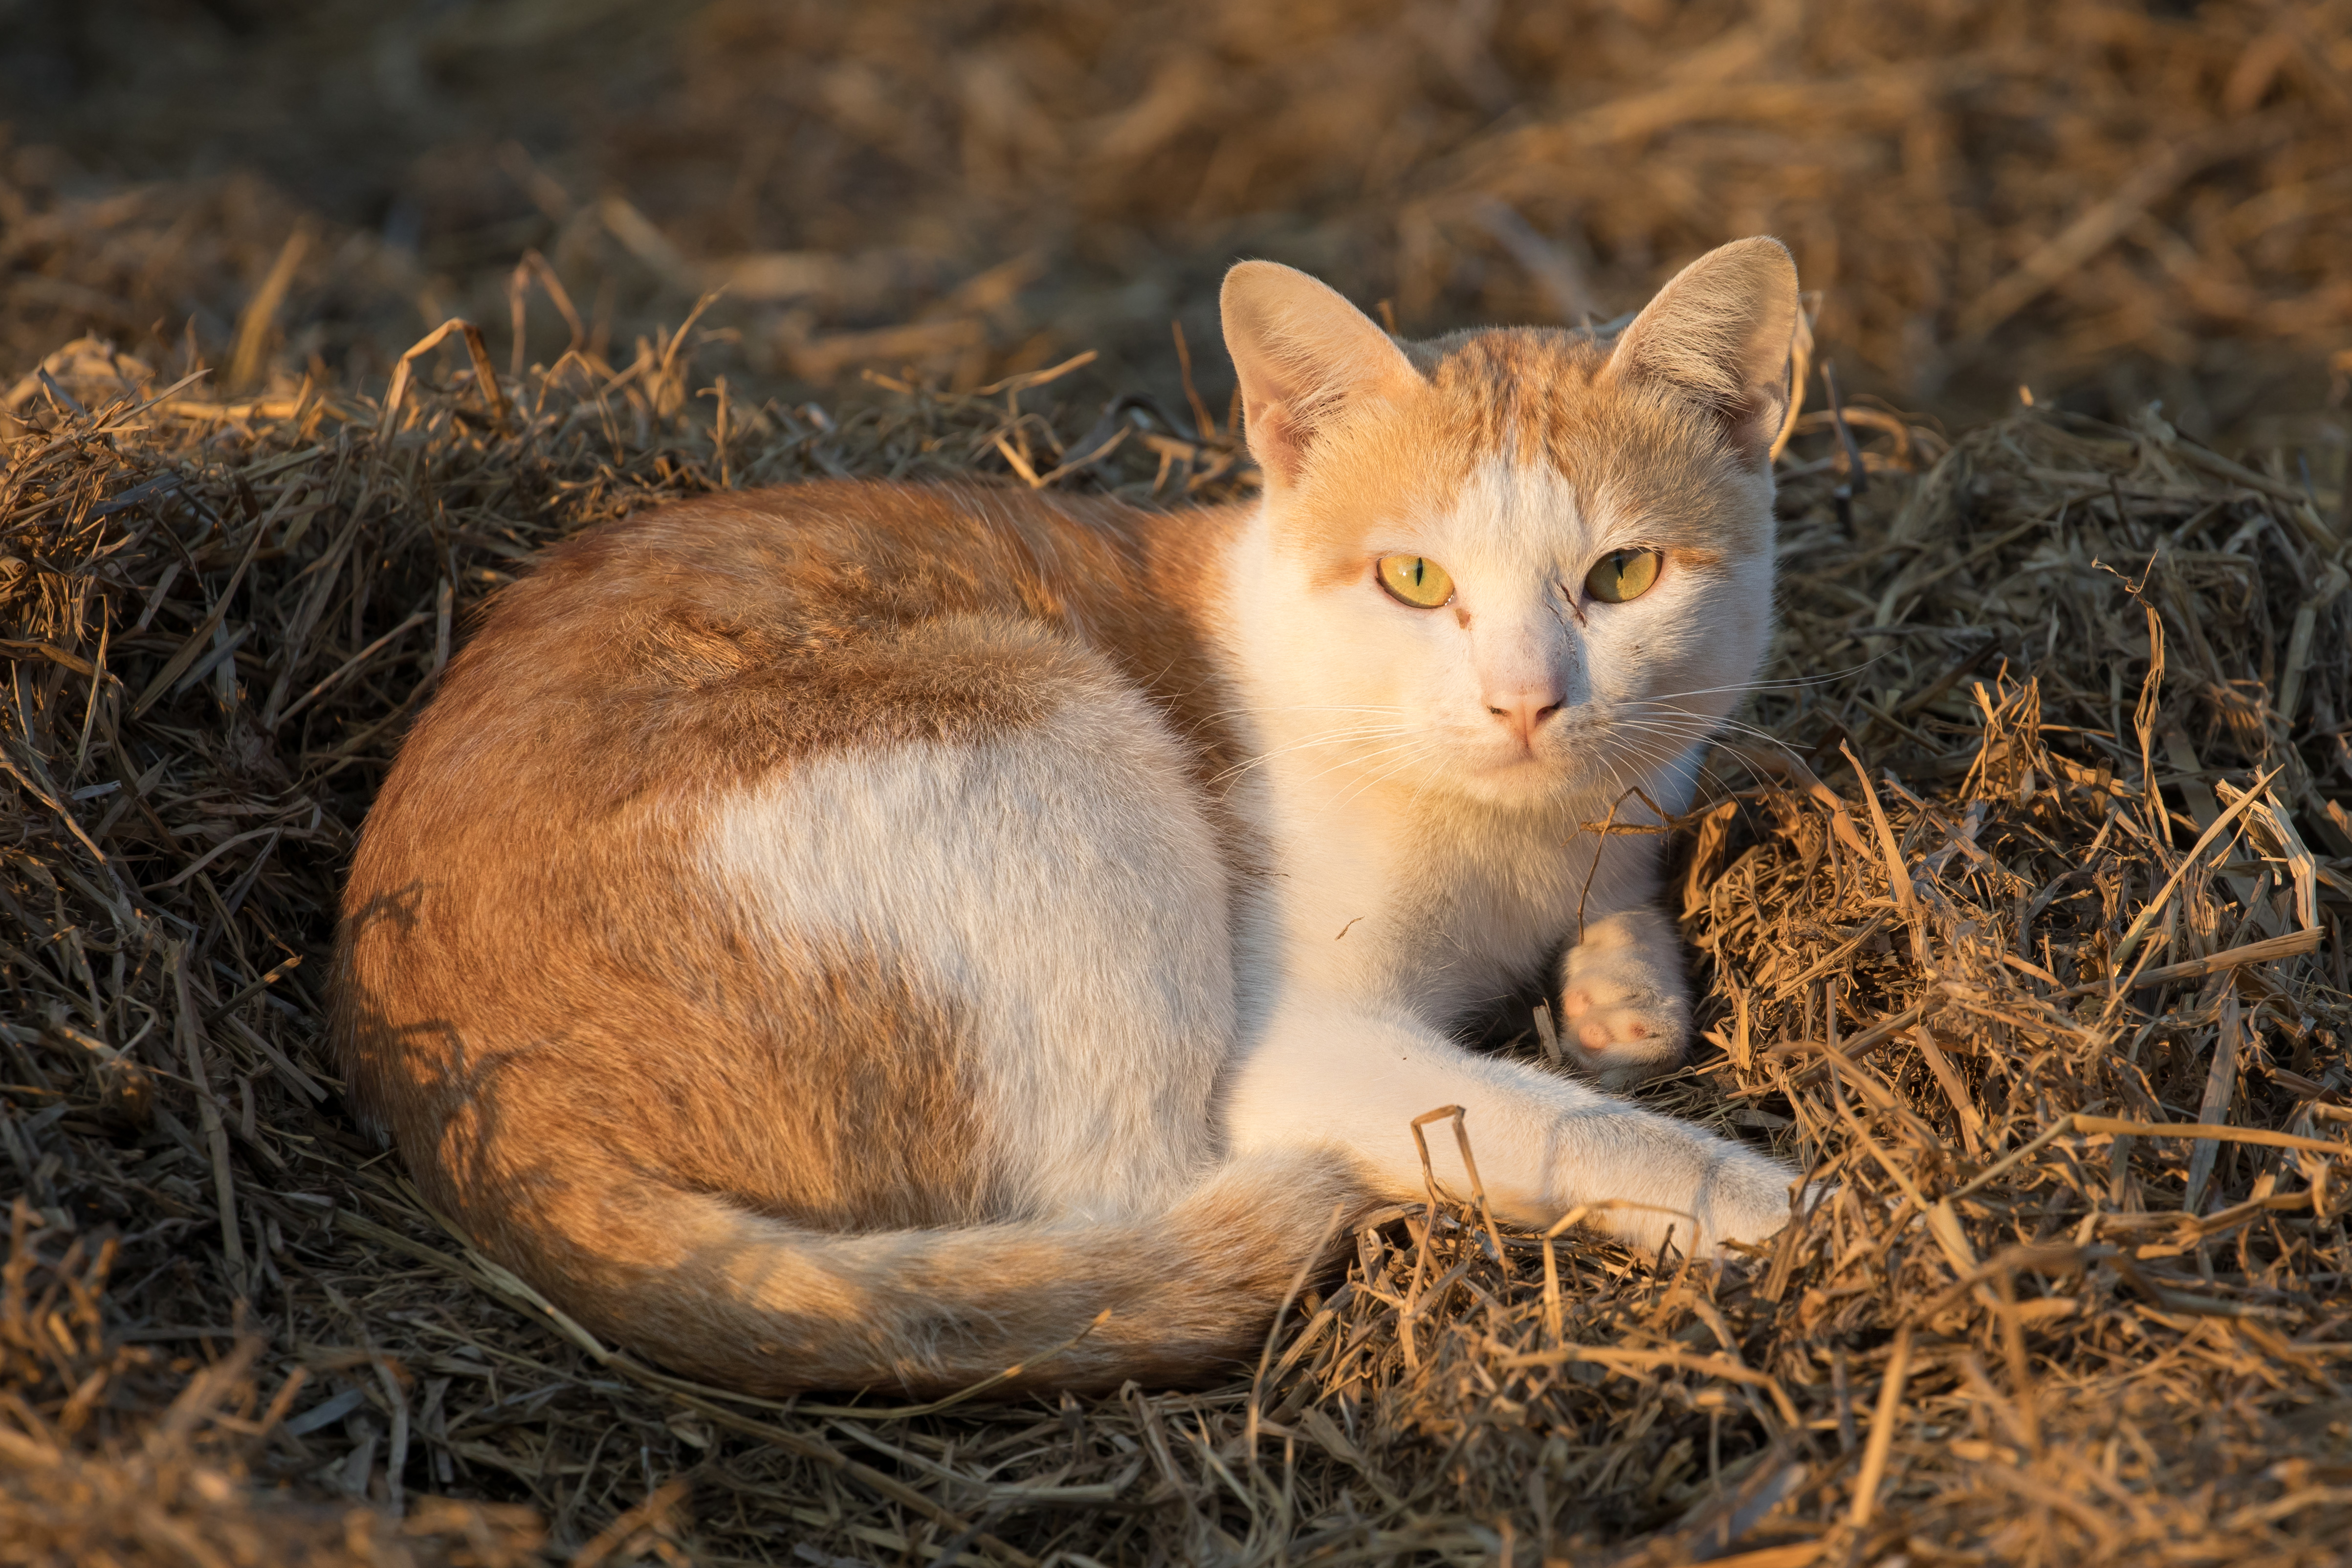

In [ ]:
from IPython.display import Image
import urllib.request
from io import BytesIO
url = 'https://upload.wikimedia.org/wikipedia/commons/4/4f/Felis_silvestris_catus_lying_on_rice_straw.jpg'

Image(urllib.request.urlopen(url).read())

Use AI api to analyze the image.

Explore vision capabilities with the Gemini API: https://ai.google.dev/gemini-api/docs/vision?authuser=1&lang=python

Choose the AI model that accept image as input: https://ai.google.dev/gemini-api/docs/models/gemini?authuser=1

In [ ]:
import httpx
import base64

image_path = "https://upload.wikimedia.org/wikipedia/commons/4/4f/Felis_silvestris_catus_lying_on_rice_straw.jpg"
image = httpx.get(image_path)

# Choose a Gemini model
genai.configure(api_key="your api key")
model = genai.GenerativeModel(model_name="gemini-2.0-flash-001")

# Create a prompt
prompt = "Caption this image."
response = model.generate_content(
    [
        {
            "mime_type": "image/jpeg",
            "data": base64.b64encode(image.content).decode("utf-8"),
        },
        prompt,
    ]
)
print(response.text)

Here are a few caption options for the image of the cat resting on hay:

**Short & Sweet:**

*   Cozy cat.
*   Golden hour nap.
*   Hay bale hangout.

**Descriptive:**

*   A ginger and white cat lounges comfortably on a bed of hay.
*   Bathed in warm sunlight, a feline enjoys a relaxing moment outdoors.
*   Serene scene of a cat curled up in dried grass.

**Playful:**

*   "This hay bale is my throne." - The cat, probably.
*   Living the farm life.
*   Catnapping in style.

**I personally like:**

* "This hay bale is my throne." - The cat, probably.
